## Task 1:
#### If there is dark then it is quite risky for the an old pedestrain and also the evening peak hours are also very critical for an person to get through an accident. In rural areas there are very less traffic signs, signals and cross walks so it is good to increase these things in rural area to decrease the rate of pedestrain fatality

## Task 2:
#### *(a):* 12am to 6am is most common for pedestrains fatalities.
#### *(b):* 6 pm and 9pm is most common for pedestrains fatalities in USA.
#### *(c):* Poor atmospheric condition has less impact on pedestrain fatality rate.
#### *(d):* The provided statement is correct.
#### *(e):* Geometric countermeasure is best fit for this issue.

In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [19]:
years_list = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
df= pd.DataFrame()
for i in years_list:
    df1= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1',low_memory=False)
    df2= pd.read_csv(f"person_all_years/{i}_PERSON.csv", encoding = 'ISO-8859-1',low_memory=False)
    df2.drop(["HARM_EV"],inplace=True,axis=1)
    df3 = pd.read_csv(f"vehicle_all_years/{i}_vehicle.csv", encoding = 'ISO-8859-1',low_memory=False)
    df3.drop(["HARM_EV"],inplace=True,axis=1)
    df2 = pd.merge(df1, df2, on='ST_CASE',how="inner").reset_index(drop=True)
    df= pd.merge(df2, df3, on="ST_CASE",how="inner").reset_index(drop=True)
    

df.head()

,STATE_x,STATENAME_x,ST_CASE,VE_TOTAL,VE_FORMS_x,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,GVWR_FROM,GVWR_FROMNAME,GVWR_TO,GVWR_TONAME,TRLR1GVWR,TRLR1GVWRNAME,TRLR2GVWR,TRLR2GVWRNAME,TRLR3GVWR,TRLR3GVWRNAME
0,1,Alabama,10001,1,1,0,0,4,4,0,...,11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",77,No Trailing Units,77,No Trailing Units,77,No Trailing Units
1,1,Alabama,10001,1,1,0,0,4,4,0,...,11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",77,No Trailing Units,77,No Trailing Units,77,No Trailing Units
2,1,Alabama,10001,1,1,0,0,4,4,0,...,11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",77,No Trailing Units,77,No Trailing Units,77,No Trailing Units
3,1,Alabama,10001,1,1,0,0,4,4,0,...,11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",77,No Trailing Units,77,No Trailing Units,77,No Trailing Units
4,1,Alabama,10002,4,4,0,0,6,6,0,...,11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",11,"Class 1: 6,000 lbs. or less (2,722 kg or less)",77,No Trailing Units,77,No Trailing Units,77,No Trailing Units


## Task 3: 

In [20]:

df= df[df["STATENAME_x"] != "KANAS"]
df= df[["AGE", "FATALS", "HARM_EV", "VSPD_LIM", "HOURNAME", "HOUR", "YEAR"]]
df= df[df["HARM_EV"]==8]
ranges= ["30 mph or less", "35 or 40 mph", "45 or 50 mph", "55 mph", "60 mph or higher"]
def ch_range(spd):
    if spd <= 30:
        return ranges[0]
    elif spd >= 35 and spd <= 40:
        return ranges[1]
    elif spd >= 45 and spd <= 50:
        return ranges[2]
    elif spd >= 55 and spd <= 60:
        return ranges[3]
    elif spd >= 60:
        return ranges[4]

Text(0.5, 1.0, 'Fatal pedestrian crashes based on speed limit')

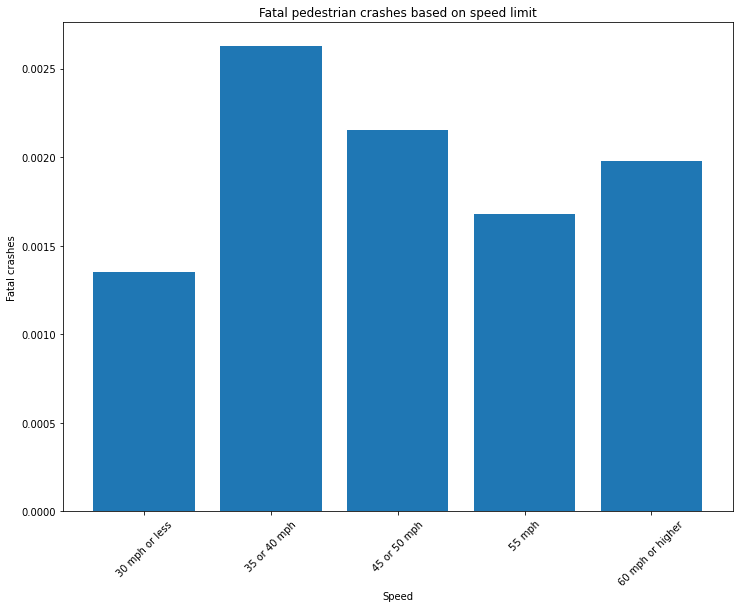

In [21]:
df['spd_lim_range'] = df["VSPD_LIM"].apply(ch_range)
dp= []
for i in ranges:
    dp.append(len(df[df.spd_lim_range==i])/(df["FATALS"].sum()*100))

plt.figure(figsize=[12, 9])
plt.bar(ranges, height=dp)
plt.xticks(rotation=45)
plt.xlabel("Speed")
plt.ylabel("Fatal crashes")
plt.title("Fatal pedestrian crashes based on speed limit")

#### Redrawing figure 4 & 9

In [22]:
ranges= ["<16", "16-24", "25-34", "35-44", "45-54", "55-64", "65+"]
def ch_range(year):
    if year < 16:
        return ranges[0]
    elif year >= 16 and year <= 24:
        return ranges[1]
    elif year >= 25 and year <= 34:
        return ranges[2]
    elif year >= 35 and year <= 44:
        return ranges[3]
    elif year >= 45 and year <= 54:
        return ranges[4]
    elif year >= 55 and year <= 64:
        return ranges[5]
    else:
        return ranges[6]
    

Text(0.5, 1.0, '(FIGURE 4): Fatal pedestrian crashes based on age limit')

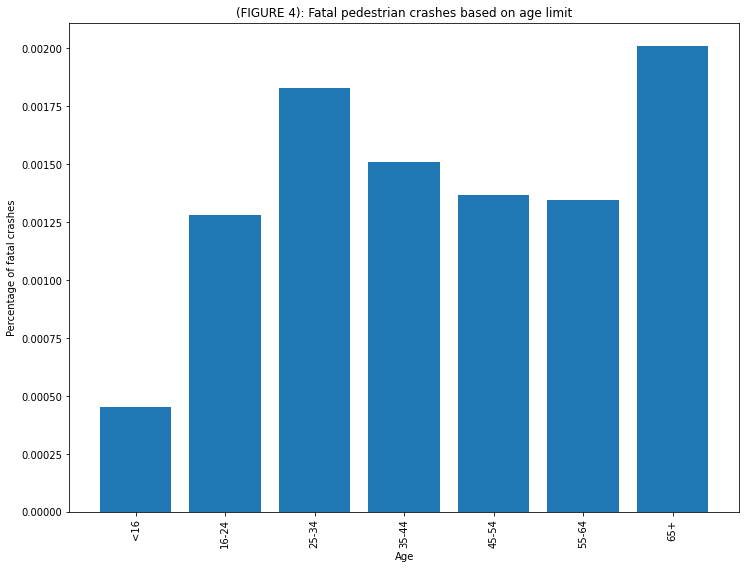

In [23]:
df['ageRange'] = df["AGE"].apply(ch_range)

dp= []
for i in ranges:
    dp.append(len(df[df.ageRange==i])/(df["FATALS"].sum()*100))

plt.figure(figsize=[12, 9])
plt.bar(ranges, height=dp)
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Percentage of fatal crashes")
plt.title("(FIGURE 4): Fatal pedestrian crashes based on age limit")

In [24]:
ranges= ['Midnight to 5:59 am', '6 am to 8:59 am', '9 am to 2:59 pm', '3 pm to 5:59 pm', '6pm to 8:59 pm', '9 pm to 11:59 pm']

def ch_range(hr):
    
    if hr >= 0 and hr < 6:
        return ranges[0]
    elif hr >= 6 and hr < 9:
        return ranges[1]
    elif hr >= 9 and hr < 15:
        return ranges[2]
    elif hr >= 15 and hr < 18:
        return ranges[3]
    elif hr >= 18 and hr < 21:
        return ranges[4]
    else:
        return ranges[5]
    


Text(0.5, 1.0, '(FIGURE 9):crashes based on hour limit')

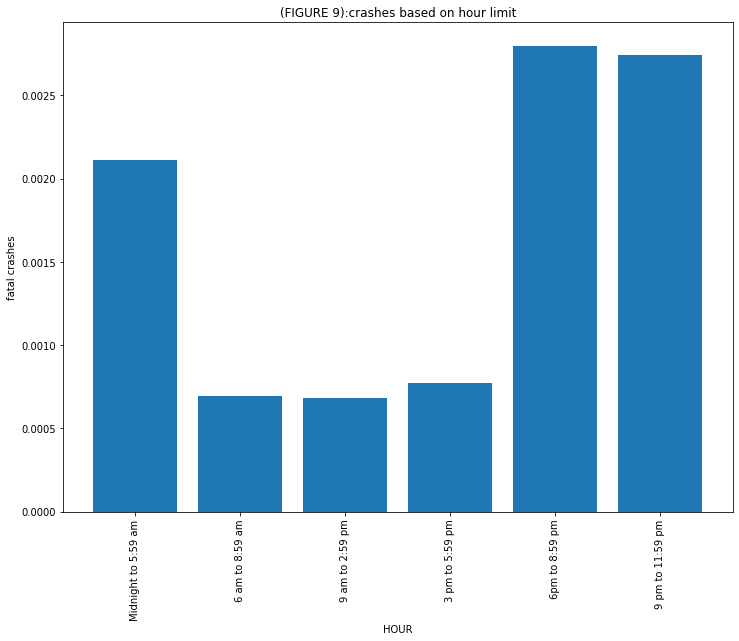

In [27]:
df['hourRange'] = df["HOUR"].apply(ch_range)
dp= []

for i in ranges:
    dp.append(len(df[df.hourRange==i])/(df["FATALS"].sum()*100))

plt.figure(figsize=[12, 9])
plt.bar(ranges, height=dp)
plt.xticks(rotation=90)
plt.xlabel("HOUR")
plt.ylabel("fatal crashes")
plt.title("(FIGURE 9):crashes based on hour limit")

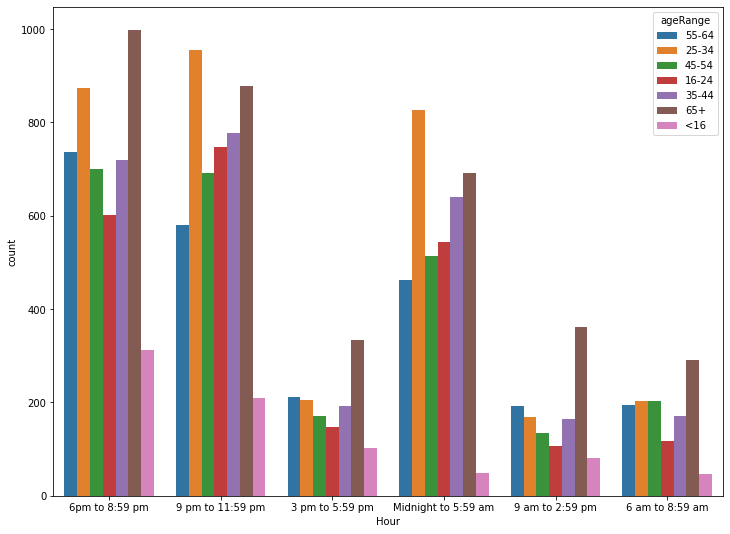

In [28]:
plt.figure(figsize=[12, 9])
sns.countplot(x= "hourRange", hue="ageRange",data=df)
plt.xlabel("Hour")
plt.show()

## Task 4:

In [45]:

all_df = pd.DataFrame()
for i in years_list:
    df = pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1')
    all_df = pd.concat([all_df, df]).reset_index(drop=True)


us_df = all_df[all_df["STATENAME"]!="Kansas"].loc[:, ["STATE","STATENAME" ,'MONTH', 'DAY', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND', 'WEATHER', 
                                'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR',"HARM_EV"]]




us_df = us_df[us_df["HARM_EV"]==8]
us_df.drop("STATENAME",inplace=True,axis=1)
us_df.drop("HARM_EV",inplace=True,axis=1)
us_df.dropna(inplace=True)
us_df=us_df.sample(n=5000)
us_df.reset_index(drop=True, inplace=True)
us_df=StandardScaler().fit_transform(us_df)

## Task 5:

In [46]:
k_vals = [5,10,12]
for k in k_vals:
    model= KMeans(n_clusters= k, init='k-means++')
    model.fit(us_df)
    print(f"Centroids for the {k} clusters:")
    print(model.cluster_centers_, '\n')

Centroids for the 5 clusters:
[[ 3.02348084e-02 -1.53044583e-02 -3.79641776e-02  1.00531472e-02
   5.24477153e-02 -1.41435500e-02  1.70041910e-02 -1.08965659e-01
   1.54273942e-02 -1.18445747e-01  8.68655610e-01  1.04917149e-01]
 [-3.78266449e-02  1.19908453e-02  4.09268337e-02 -2.80650162e-02
  -8.51801548e-02 -1.41435500e-02 -4.49819407e-02 -9.95109696e-02
  -2.28112845e-02 -1.18445747e-01 -8.72386704e-01 -1.22487921e-01]
 [-1.92310220e-01  1.43573414e+00  1.19732048e+00 -1.46251048e-01
  -1.20152556e-01  7.07036067e+01  6.55486991e+00  6.09734527e-01
  -7.36839081e-02 -1.18445747e-01 -5.78481828e-01 -4.14616161e-01]
 [ 2.22074013e-01  1.31084770e-01 -1.54429777e-01  7.15089299e-01
  -6.98948030e-01 -1.41435500e-02  1.20543005e+00  9.22795502e+00
   1.69979809e-01 -1.18445747e-01 -2.31137085e-01 -2.35994689e-01]
 [ 6.32203270e-02 -2.86657136e-03  2.10836154e-02  4.07593498e-02
   1.47328144e+00 -1.41435500e-02 -9.02888079e-02 -1.28985686e-01
   9.90397396e-02  7.37812050e+00 -1.10665

## Task 6:

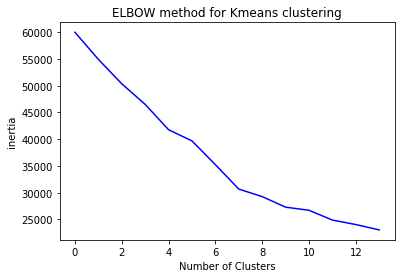

In [47]:
css = []
for c in range(1, 15):
    model= KMeans(n_clusters= c, init= 'k-means++', max_iter= 200, n_init= 10, random_state=1)
    model.fit(us_df)
    css.append(model.inertia_)
    

plt.plot(css, color= 'blue')
plt.xlabel("Number of Clusters")
plt.ylabel("inertia")
plt.title("ELBOW method for Kmeans clustering")
plt.show()

##### **The optimal value of k is 5**

In [48]:
kmeans= KMeans(n_clusters= 5, init='k-means++').fit(us_df)

print(f"Centroids of {5} clusters:")
model.cluster_centers_

Centroids of 5 clusters:


array([[-7.92833315e-01,  6.93221828e-01, -5.07286942e-01,
        -1.08441740e-01, -2.32580782e-01, -1.41435500e-02,
        -9.15081030e-02, -1.05586108e-01, -7.36839081e-02,
        -1.18445747e-01, -9.46078535e-01, -4.10377685e-01],
       [ 9.12113469e-01, -1.09856803e+00, -1.20644819e-01,
         6.07156975e-03, -2.32337228e-01, -1.41435500e-02,
        -1.00850596e-01, -7.67894066e-02, -7.36839081e-02,
        -1.18445747e-01,  3.81072544e-01, -4.14616161e-01],
       [-3.91432935e-03, -7.63347321e-02,  2.72812004e-03,
        -8.88202860e-02,  1.57050894e-01, -1.41435500e-02,
         1.07816478e-01, -1.25512026e-01, -7.36839081e-02,
        -1.18445747e-01,  1.27212639e-01,  2.23464092e+00],
       [ 8.45584768e-02, -2.43570902e-04,  5.24894116e-03,
         3.16396374e-02,  8.19625295e-01, -1.41435500e-02,
        -8.77552075e-02, -1.28096198e-01, -7.36839081e-02,
         7.57283651e+00, -1.11145265e-01,  6.57112671e-01],
       [ 6.62295806e-01,  7.78803382e-01, -8.4579487

## Task 7:

In [50]:
kansas_df = all_df[all_df["STATENAME"]=="Kansas"].loc[:, ["STATE","STATENAME" ,'MONTH', 'DAY', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND', 'WEATHER', 
                                'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR',"HARM_EV"]]

kansas_df = kansas_df[kansas_df["HARM_EV"]==8] 
kansas_df.drop("STATENAME",inplace=True,axis=1)
kansas_df.drop("HARM_EV",inplace=True,axis=1)
kansas_df.dropna(inplace=True)
kansas_df.reset_index(drop=True, inplace=True)
kansas_df=StandardScaler().fit_transform(kansas_df)



c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


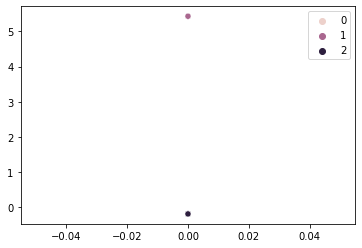

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

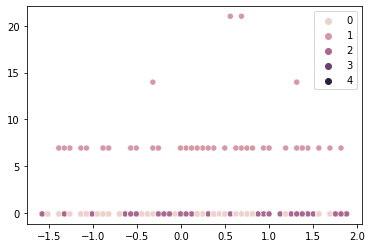

In [53]:
label= kmeans.predict(kansas_df)
x=[]
y=[]
for i in range(len(kansas_df)):
    y.append(kansas_df[i][9])
    x.append(kansas_df[i][0])

sns.scatterplot(x,y,hue=label)
plt.show()
label= kmeans.predict(us_df)
x=[]
y=[]
for i in range(len(us_df)):
    y.append(us_df[i][9])
    x.append(us_df[i][0])

sns.scatterplot(x,y,hue=label)

##### **Kansas fits well in 1 and 2**

## Task 8:

In [65]:
agg = AgglomerativeClustering(n_clusters=5, compute_full_tree=True, compute_distances=True).fit(us_df)

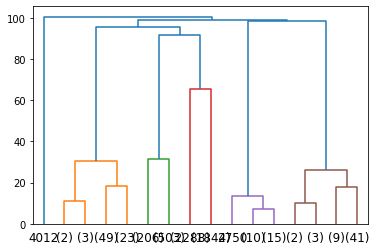

In [67]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(agg, truncate_mode="level", p=4)